# Import Library

In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder dari sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("heart_data8.csv")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
0,56,L,168,62.0,110,80,0,0,1.0,0.0
1,44,P,156,85.0,140,90,0,0,1.0,1.0
2,45,P,165,64.0,130,70,0,0,0.0,1.0
3,44,L,169,82.0,150,100,0,0,1.0,1.0
4,54,L,156,56.0,100,60,0,0,0.0,0.0


In [3]:
df.shape

(7000, 10)

In [4]:
df.columns.values

array(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke',
       'alco', 'active', 'cardio'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     7000 non-null   int64  
 1   gender  7000 non-null   object 
 2   height  7000 non-null   int64  
 3   weight  7000 non-null   float64
 4   ap_hi   7000 non-null   int64  
 5   ap_lo   7000 non-null   int64  
 6   smoke   7000 non-null   int64  
 7   alco    7000 non-null   int64  
 8   active  6999 non-null   float64
 9   cardio  6999 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 547.0+ KB


# Penjelasan perkolom

age: Menunjukkan usia individu dalam dataset

gender: Menunjukkan jenis kelamin individu

height: Menunjukkan tinggi badan individu.

weight: Menunjukkan berat badan individu.

ap_hi: Merupakan tekanan darah sistolik.

ap_lo: Merupakan tekanan darah diastolik.

smoke: Menunjukkan apakah individu merokok atau tidak

alco: Menunjukkan apakah individu mengonsumsi alkohol atau tidak.

active: Menunjukkan apakah individu aktif secara fisik atau tidak.

cardio: menunjukkan variabel target atau label, yang menunjukkan keberadaan atau ketiadaan penyakit kardiovaskular.

In [6]:
df.describe()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6999.000000,6999.000000
mean,51.871571,164.480000,74.642414,127.076000,82.385714,0.119000,0.055286,0.790542,0.497785
std,13.807349,8.095367,14.836063,21.590354,27.935929,0.323812,0.228553,0.406951,0.500031
min,5.000000,76.000000,30.000000,11.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,62.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,89.000000,198.000000,200.000000,902.000000,1100.000000,1.000000,1.000000,1.000000,1.000000


# pengecekan missing value

In [7]:
df.isna().sum()

age       0
gender    0
height    0
weight    0
ap_hi     0
ap_lo     0
smoke     0
alco      0
active    1
cardio    1
dtype: int64

# perhitungan persentase missing value

In [8]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100

    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom age:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom gender:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom height:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom weight:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom ap_hi:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom ap_lo:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom smoke:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom alco:
Jumlah nilai null: 0
Total data: 7000
Persentase missing value: 0.00%

Kolom active:
Jumlah nilai null: 1
Total data: 7000
Persentase missing value: 0.01%

Kolom cardio:
Jumlah nilai null: 1
Total data: 7000
Persentase missing value: 0.01%



# pengecekan data yang duplikat

In [9]:
df[df.duplicated()]

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
169,66,L,170,70.0,140,90,0,0,1.0,1.0
252,30,L,175,70.0,120,80,0,0,1.0,0.0
1557,64,P,170,72.0,120,80,0,0,1.0,0.0
2171,57,L,165,65.0,120,80,0,0,1.0,0.0
2382,34,P,165,65.0,120,80,0,0,0.0,0.0
2913,51,P,165,70.0,120,80,0,0,1.0,1.0
3281,60,P,165,60.0,120,80,0,0,0.0,0.0
3448,64,L,170,63.0,120,80,0,0,1.0,0.0
3474,42,P,170,70.0,120,80,0,0,1.0,0.0
3514,56,L,167,70.0,120,80,0,0,1.0,0.0


In [10]:
df.duplicated().sum()

30

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(6970, 10)

## Exploratory data analis

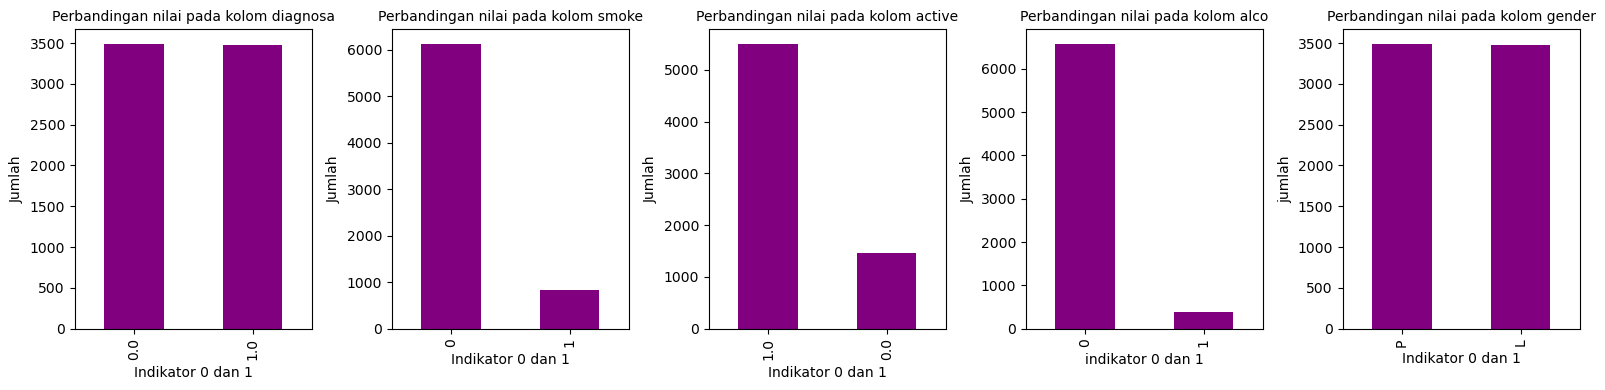

Jumlah nilai pada kolom 'cardio':
0.0    3494
1.0    3475
Name: cardio, dtype: int64

Jumlah nilai pada kolom 'smoke':
0    6137
1     833
Name: smoke, dtype: int64

Jumlah nilai pada kolom 'active':
1.0    5505
0.0    1464
Name: active, dtype: int64

Jumlah nilai pada kolom 'alco':
0    6583
1     387
Name: alco, dtype: int64

Jumlah nilai pada kolom 'gender':
P    3494
L    3476
Name: gender, dtype: int64



In [13]:
import matplotlib.pyplot as plt

# Daftar kolom yang akan divisualisasikan
columns = ["cardio", "smoke", "active", "alco", "gender"]
titles = [
    "Perbandingan nilai pada kolom diagnosa",
    "Perbandingan nilai pada kolom smoke",
    "Perbandingan nilai pada kolom active",
    "Perbandingan nilai pada kolom alco",
    "Perbandingan nilai pada kolom gender"
]
xlabels = [
    "Indikator 0 dan 1", 
    "Indikator 0 dan 1", 
    "Indikator 0 dan 1",
    "indikator 0 dan 1",
    "Indikator 0 dan 1"
]
ylabels = ["Jumlah", "Jumlah", "Jumlah", "Jumlah", "jumlah"]

# Membuat subplots bersampingan
fig, axes = plt.subplots(1, len(columns), figsize=(16, 4))

# Iterasi untuk membuat visualisasi setiap kolom
for ax, col, title, xlabel, ylabel in zip(axes, columns, titles, xlabels, ylabels):
    # Membuat diagram batang pada setiap subplot
    df[col].value_counts().plot(kind="bar", color='purple', ax=ax)
    
    # Menambahkan judul dan label sumbu
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan hasil
plt.show()

# Mencetak jumlah nilai untuk setiap kolom
for col in columns:
    print(f"Jumlah nilai pada kolom '{col}':\n{df[col].value_counts()}\n")


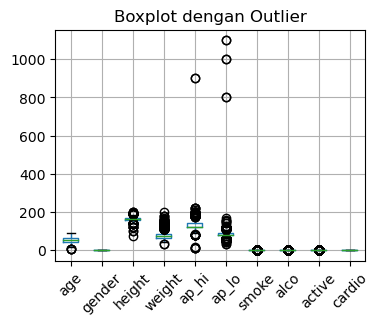

Jumlah total data: 6970


In [56]:
# persebaran nilai outlier
import matplotlib.pyplot as plt

def plot_outlier_boxplot(df):
    plt.figure(figsize=(4, 3))
    df.boxplot()
    plt.title("Boxplot dengan Outlier")
    plt.xticks(rotation=45)
    plt.show()

plot_outlier_boxplot(df)
# Menampilkan jumlah total baris (data point)
print(f"Jumlah total data: {len(df)}")

In [54]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
0,56,0,168,62.0,110,80,0,0,1.0,0.0
1,44,1,156,85.0,140,90,0,0,1.0,1.0
2,45,1,165,64.0,130,70,0,0,0.0,1.0
3,44,0,169,82.0,150,100,0,0,1.0,1.0
4,54,0,156,56.0,100,60,0,0,0.0,0.0


In [16]:
# Encode categorical variable 'gender'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

print(df)

      age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio
0      56       0     168    62.0    110     80      0     0     1.0     0.0
1      44       1     156    85.0    140     90      0     0     1.0     1.0
2      45       1     165    64.0    130     70      0     0     0.0     1.0
3      44       0     169    82.0    150    100      0     0     1.0     1.0
4      54       0     156    56.0    100     60      0     0     0.0     0.0
5      39       1     151    67.0    120     80      0     0     0.0     0.0
6      53       0     157    93.0    130     80      0     0     1.0     0.0
7      55       1     178    95.0    130     90      0     0     1.0     1.0
8      60       0     158    71.0    110     70      0     0     1.0     0.0
9      27       1     164    68.0    110     60      0     0     0.0     0.0
10     61       1     169    80.0    120     80      0     0     1.0     0.0
11     47       1     173    60.0    120     80      0     0     1.0     0.0

In [17]:
def remove_outliers(df):
    # Inisialisasi dataframe tanpa outlier
    df_no_outliers = df.copy()

    # Iterasi melalui setiap kolom
    for col in df.columns:
        # Hitung Q1, Q3, dan IQR untuk kolom saat ini
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # menentukan batas bawah dan batas atas untuk kolom saat ini
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi dan atasi outlier pada kolom saat ini
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers

df_no_outliers = remove_outliers(df)


In [18]:
def remove_outliers(df):
    # Simpan jumlah data sebelum menghapus outlier
    initial_count = len(df)

    # Inisialisasi dataframe tanpa outlier
    df_no_outliers = df.copy()
    
    # Inisialisasi dictionary untuk menyimpan jumlah outlier per kolom
    outlier_counts = {}

    # Iterasi melalui setiap kolom
    for col in df.columns:
        # Hitung Q1, Q3, dan IQR untuk kolom saat ini
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan batas atas untuk kolom saat ini
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi jumlah outlier pada kolom saat ini
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

        # Hapus outlier dari dataframe
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    # Simpan jumlah data setelah menghapus outlier
    final_count = len(df_no_outliers)
    print(f"Jumlah data sebelum menghapus outlier: {initial_count}")
    print(f"Jumlah data setelah menghapus outlier: {final_count}")

    return df_no_outliers

df_no_outliers = remove_outliers(df)


Jumlah data sebelum menghapus outlier: 6970
Jumlah data setelah menghapus outlier: 4210


Jumlah data sebelum menghapus outlier: 6970
Jumlah data setelah menghapus outlier: 4210


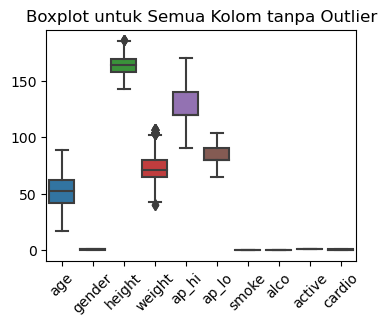

Jumlah total data setelah pembersihan outlier: 4210


In [63]:
# memanggil fungsi remove_outliers(df)
df_no_outliers = remove_outliers(df)

# membuat boxplot untuk semua kolom setelah penghapusan outlier
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_no_outliers)
plt.title('Boxplot untuk Semua Kolom tanpa Outlier')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()

# Menampilkan jumlah total baris (data point) setelah pembersihan outlier
print(f"Jumlah total data setelah pembersihan outlier: {len(df_no_outliers)}")



## membuat salinan 

In [20]:
df_no_outliers_copy = df_no_outliers.copy()

#  Pendefinisian Model

In [21]:
lr = LogisticRegression()
nb = GaussianNB()

# Persiapan Data yang digunakan

In [22]:
from imblearn.over_sampling import SMOTE

# Menyimpan data dalam variabel X dan y
X = df_no_outliers.drop(['cardio'], axis=1)
y = df_no_outliers['cardio']

# Penanganan Ketidakseimbangan Kelas dengan Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
from collections import Counter

# Melihat jumlah data sebelum SMOTE
print(f"Total data sebelum SMOTE: {len(X)}")
print(f"Jumlah kelas sebelum SMOTE:\n{Counter(y)}\n")

# Melihat jumlah data setelah SMOTE
print(f"Total data setelah SMOTE: {len(X_resampled)}")
print(f"Jumlah kelas setelah SMOTE:\n{Counter(y_resampled)}\n")

# Melihat jumlah data setelah split
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Total data sebelum SMOTE: 4210
Jumlah kelas sebelum SMOTE:
Counter({0.0: 2167, 1.0: 2043})

Total data setelah SMOTE: 4334
Jumlah kelas setelah SMOTE:
Counter({0.0: 2167, 1.0: 2167})

Jumlah data training: 3467
Jumlah data testing: 867


In [24]:
print(f"Jumlah data awal: {len(df_no_outliers)}")
print(f"Jumlah data setelah SMOTE: {len(X_resampled)}")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data awal: 4210
Jumlah data setelah SMOTE: 4334
Jumlah data training: 3467
Jumlah data testing: 867


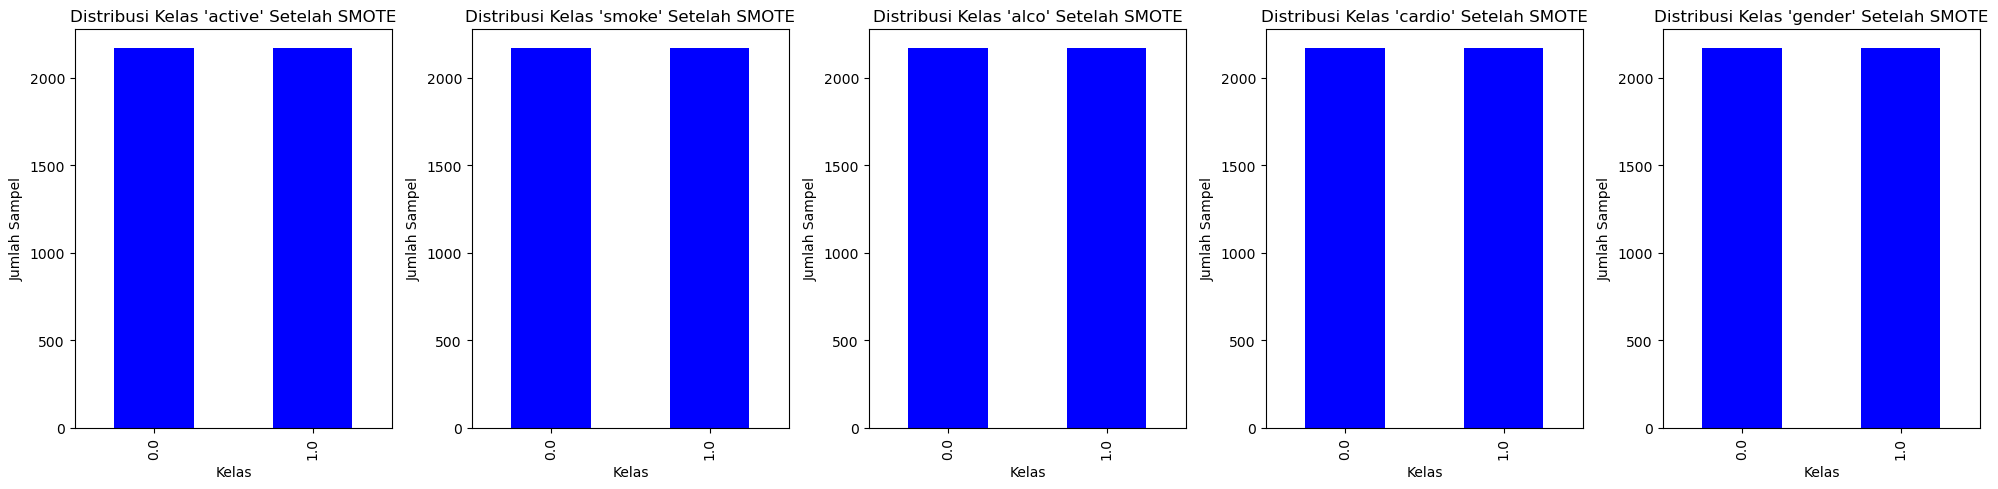

In [25]:
import matplotlib.pyplot as plt

# Visualisasi Distribusi Kelas Setelah SMOTE

# Daftar fitur yang akan divisualisasikan
features = ['active', 'smoke', 'alco', 'cardio', 'gender']

# Menentukan ukuran figure agar grafik ditampilkan menyamping
plt.figure(figsize=(len(features) * 4, 5))

# Looping untuk membuat subplot horizontal untuk setiap fitur
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)  # Membuat subplot dalam satu baris
    y_resampled.value_counts().plot(kind='bar', color=['blue', 'blue'])  # Membuat grafik batang
    plt.title(f"Distribusi Kelas '{feature}' Setelah SMOTE")  # Menambahkan judul grafik
    plt.xlabel("Kelas")  # Memberi label sumbu x
    plt.ylabel("Jumlah Sampel")  # Memberi label sumbu y

# Menyesuaikan tata letak agar tidak bertumpuk
plt.tight_layout()

# Menampilkan grafik
plt.show()


# Logistik Regression

In [26]:
import time  # Import modul time untuk mengukur waktu eksekusi

# Inisialisasi Model
model = LogisticRegression(max_iter=500)  # Membuat model Logistic Regression dengan iterasi maksimum 500

# Proses Training Model
start_time = time.time()  # Catat waktu sebelum training dimulai
model.fit(X_train, y_train)  # Melatih model dengan data training
training_time = time.time() - start_time  # Hitung waktu yang dibutuhkan untuk training
print(f"Waktu training: {training_time:.4f} detik")  # Tampilkan waktu training

# Proses Prediksi Model
start_time = time.time()  # Catat waktu sebelum prediksi dimulai
pred = model.predict(X_test)  # Melakukan prediksi pada data testing
prediction_time = time.time() - start_time  # Hitung waktu yang dibutuhkan untuk prediksi
print(f"Waktu prediksi: {prediction_time:.4f} detik")  # Tampilkan waktu prediksi

# Evaluasi Model
accuracy = accuracy_score(y_test, pred)  # Menghitung akurasi model berdasarkan hasil prediksi
print("Akurasi model setelah penyetelan hyperparameter:", accuracy)  # Tampilkan hasil akurasi


Waktu training: 0.2968 detik
Waktu prediksi: 0.0000 detik
Akurasi model setelah penyetelan hyperparameter: 0.720876585928489


###  evaluasi Model

In [27]:
print("\n LOGISTIC REGRESSION \n")

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, pred))

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, pred)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100
# Menampilkan akurasi
print("Akurasi model:", accuracy_percent, "%\n")



 LOGISTIC REGRESSION 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       443
         1.0       0.74      0.66      0.70       424

    accuracy                           0.72       867
   macro avg       0.72      0.72      0.72       867
weighted avg       0.72      0.72      0.72       867

Akurasi model: 72.0876585928489 %



### Visualisasi Classification eport


 LOGISTIC REGRESSION 



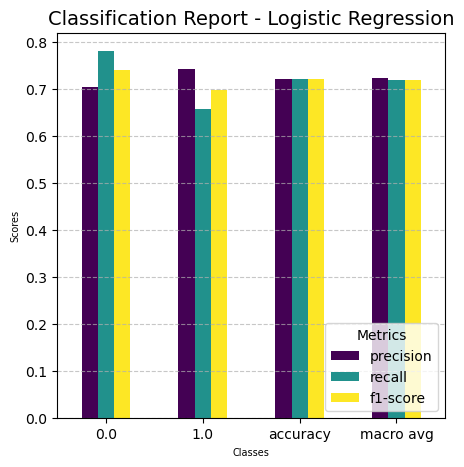

Akurasi model: 72.09 %



In [28]:
print("\n LOGISTIC REGRESSION \n")

# Tampilkan classification report dalam format dictionary
report = classification_report(y_test, pred, output_dict=True)

# Konversi ke DataFrame
df_report = pd.DataFrame(report).transpose()

# Ambil hanya kelas dan metrik utama (precision, recall, f1-score)
df_metrics = df_report.iloc[:-1, :-1]

# Plot metrik untuk setiap kelas
df_metrics.plot(kind='bar', figsize=(5, 5), colormap='viridis')

# Tambahkan label, judul, dan legend
plt.title('Classification Report - Logistic Regression', fontsize=14)
plt.xlabel('Classes', fontsize=7)
plt.ylabel('Scores', fontsize=7)
plt.xticks(rotation=0)
plt.legend(title='Metrics', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, pred)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100

# Menampilkan akurasi
print(f"Akurasi model: {accuracy_percent:.2f} %\n")


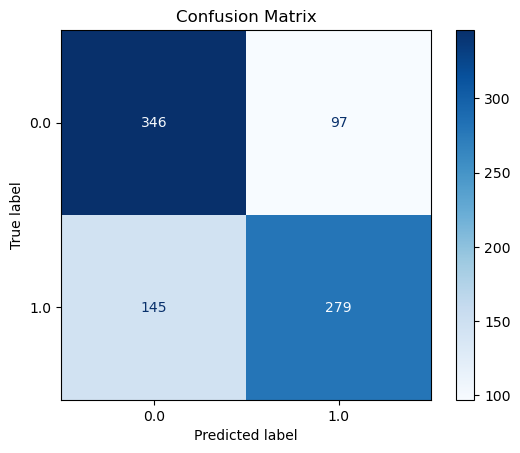

In [29]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

print(len(y_test))  # Pastikan ini sama dengan jumlah data testing (1394)
print(len(pred))  # Pastikan ini juga sama

cm = confusion_matrix(y_test, pred)
print(cm.sum())  # Total nilai dalam confusion matrix harus sama dengan len(y_test)


867
867
867


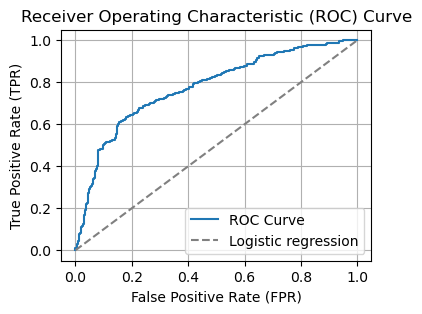

AUC-ROC Score: 0.7760072831040503


In [31]:
# Peroleh skor probabilitas prediksi kelas positif dari model
y_scores = model.predict_proba(X_test)[:, 1]

# Hitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

## Plot ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Logistic regression')

# Menampilkan threshold optimal pada plot
#plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Evaluasi kinerja model dengan menghitung Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc)

In [32]:
test1 = {'age':[45, 95, 60],
         'gender':[1, 1, 0,],
         'height':[160, 150, 155],
         'weight':[75, 85, 70],
         'ap_hi':[100, 160, 180],
         'ap_lo':[80, 90, 100],
         'smoke':[1, 0, 0],
         'alco':[1, 1, 1],
         'active':[1, 0, 0]}
test1 = pd.DataFrame(test1)
test1

# Membuat prediksi
pred= model.predict(test1)
pred


array([0., 1., 1.])

In [33]:
# Mengambil dan menampilkan nilai koefisien
coefficients = model.coef_[0]  # Koefisien untuk fitur
intercept = model.intercept_[0]  # Intercept

# Menampilkan koefisien
print("Intercept:", intercept)
print("Koefisien:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Intercept: -4.099468138101638
Koefisien:
age: 0.0007461904470959568
gender: -0.023265924397695883
height: -0.02018628285086411
weight: 0.015470602985363738
ap_hi: 0.06764116454549131
ap_lo: 0.022438422059982383
smoke: 0.0
alco: 0.0
active: -4.074994890240793


# Naive Bayes

In [34]:
import time  # Import modul time untuk mengukur waktu eksekusi
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV untuk pencarian hyperparameter terbaik

# Inisialisasi Model Naive Bayes
model = GaussianNB()  # Membuat model Gaussian Naive Bayes

# Menentukan Ruang Hyperparameter
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variasi nilai var_smoothing yang akan diuji
}

# Inisialisasi GridSearchCV untuk Optimasi Hyperparameter

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

# Proses Training Model dengan GridSearchCV
start_time = time.time()  # Catat waktu sebelum training
grid_search.fit(X_train, y_train)  # Melatih model dengan data training
training_time = time.time() - start_time  # Hitung waktu training
print(f"Waktu training: {training_time:.4f} detik")  # Tampilkan waktu training

# Mendapatkan Model Terbaik Setelah Hyperparameter Tuning
best_model = grid_search.best_estimator_  # Menyimpan model terbaik berdasarkan hasil GridSearchCV

# Proses Prediksi Model
start_time = time.time()  # Catat waktu sebelum prediksi
predictions = best_model.predict(X_test)  # Melakukan prediksi pada data testing
prediction_time = time.time() - start_time  # Hitung waktu prediksi
print(f"Waktu prediksi: {prediction_time:.4f} detik")  # Tampilkan waktu prediksi

# Evaluasi Model dengan Akurasi
accuracy = accuracy_score(y_test, predictions)  # Menghitung akurasi model
print("Akurasi model setelah penyetelan hyperparameter:", accuracy)  # Tampilkan hasil akurasi


Waktu training: 0.2520 detik
Waktu prediksi: 0.0000 detik
Akurasi model setelah penyetelan hyperparameter: 0.707035755478662


###  evaluasi Model

In [35]:
print("\n NAIVE BAYES \n")

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, predictions))

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, predictions)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100
# Menampilkan akurasi
print("Akurasi model:", accuracy_percent, "%\n")



 NAIVE BAYES 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.83      0.74       443
         1.0       0.77      0.58      0.66       424

    accuracy                           0.71       867
   macro avg       0.72      0.70      0.70       867
weighted avg       0.72      0.71      0.70       867

Akurasi model: 70.70357554786621 %




 NAIVE BAYES 



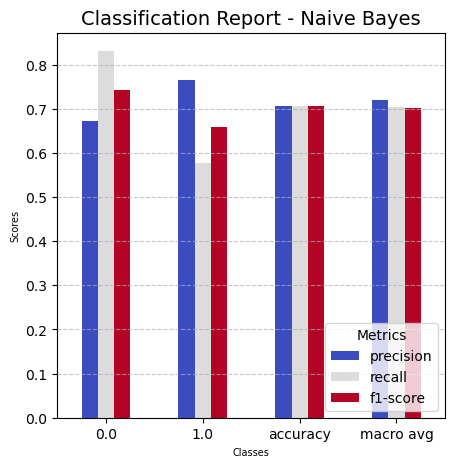

Akurasi model: 70.70 %



In [36]:
print("\n NAIVE BAYES \n")

# Tampilkan classification report dalam format dictionary
report = classification_report(y_test, predictions, output_dict=True)

# Konversi report ke DataFrame
df_report = pd.DataFrame(report).transpose()

# Ambil hanya kelas dan metrik utama (precision, recall, f1-score)
df_metrics = df_report.iloc[:-1, :-1]

# Plot metrik untuk setiap kelas
df_metrics.plot(kind='bar', figsize=(5, 5), colormap='coolwarm')

# Tambahkan label, judul, dan legend
plt.title('Classification Report - Naive Bayes', fontsize=14)
plt.xlabel('Classes', fontsize=7)
plt.ylabel('Scores', fontsize=7)
plt.xticks(rotation=0)
plt.legend(title='Metrics', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, predictions)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100

# Menampilkan akurasi
print(f"Akurasi model: {accuracy_percent:.2f} %\n")


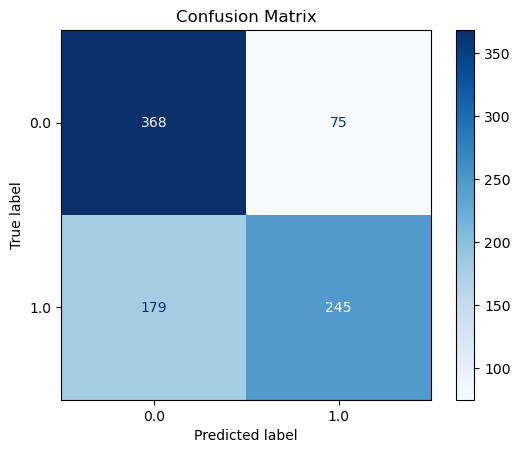

In [37]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

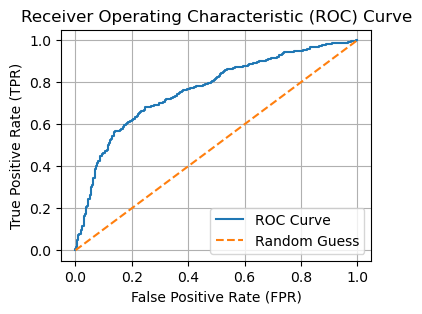

AUC-ROC Score: 0.7645715320073256


In [38]:
# Peroleh skor probabilitas prediksi kelas positif dari model
y_scores = best_model.predict_proba(X_test)[:, 1]

# Hitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi kinerja model dengan menghitung Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc)


# Model Inference

In [39]:
test1 = {'age':[45, 95, 60],
         'gender':[1, 1, 0,],
         'height':[160, 150, 155],
         'weight':[75, 85, 70],
         'ap_hi':[100, 160, 180],
         'ap_lo':[80, 90, 100],
         'smoke':[1, 0, 0],
         'alco':[1, 1, 1],
         'active':[1, 0, 0]}
test1 = pd.DataFrame(test1)
test1

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active
0,45,1,160,75,100,80,1,1,1
1,95,1,150,85,160,90,0,1,0
2,60,0,155,70,180,100,0,1,0


In [40]:
model.fit(X_train, y_train)
# Membuat prediksi
predictions = model.predict(test1)
predictions


array([0., 1., 1.])

# Model tanpa menggunakan SMOTE

## Persiapan data yang digunakan

In [41]:
df_no_outliers_copy.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
0,56,0,168,62.0,110,80,0,0,1.0,0.0
1,44,1,156,85.0,140,90,0,0,1.0,1.0
3,44,0,169,82.0,150,100,0,0,1.0,1.0
6,53,0,157,93.0,130,80,0,0,1.0,0.0
7,55,1,178,95.0,130,90,0,0,1.0,1.0


In [42]:
df_no_outliers_copy.shape

(4210, 10)

In [43]:
from sklearn.model_selection import train_test_split

# Menyimpan data dalam variabel X dan y
X = df_no_outliers_copy.drop(['cardio'], axis=1)
y = df_no_outliers_copy['cardio']

# Memisahkan data menjadi data training dan data testing tanpa oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 3368
Jumlah data testing: 842


## Logistic regression

In [44]:
# Inisialisasi dan latih model (menggunakan Logistic Regression)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Membuat prediksi
pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, pred)
print("Akurasi model setelah penyetelan hyperparameter:", accuracy)

Akurasi model setelah penyetelan hyperparameter: 0.7244655581947743


In [45]:
import time  # Import modul time untuk mengukur waktu eksekusi

# Inisialisasi Model
model = LogisticRegression(max_iter=500)  # Membuat model Logistic Regression dengan iterasi maksimum 500

# Proses Training Model
start_time = time.time()  # Catat waktu sebelum training dimulai
model.fit(X_train, y_train)  # Melatih model dengan data training
training_time = time.time() - start_time  # Hitung waktu yang dibutuhkan untuk training
print(f"Waktu training: {training_time:.4f} detik")  # Tampilkan waktu training

# Proses Prediksi Model
start_time = time.time()  # Catat waktu sebelum prediksi dimulai
pred = model.predict(X_test)  # Melakukan prediksi pada data testing
prediction_time = time.time() - start_time  # Hitung waktu yang dibutuhkan untuk prediksi
print(f"Waktu prediksi: {prediction_time:.4f} detik")  # Tampilkan waktu prediksi

# Evaluasi Model
accuracy = accuracy_score(y_test, pred)  # Menghitung akurasi model berdasarkan hasil prediksi
print("Akurasi model setelah penyetelan hyperparameter:", accuracy)  # Tampilkan hasil akurasi


Waktu training: 0.0937 detik
Waktu prediksi: 0.0156 detik
Akurasi model setelah penyetelan hyperparameter: 0.7244655581947743


In [46]:
print("\n LOGISTIC REGRESSION \n")

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, pred))

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, pred)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100
# Menampilkan akurasi
print("Akurasi model:", accuracy_percent, "%\n")



 LOGISTIC REGRESSION 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.84      0.76       433
         1.0       0.78      0.60      0.68       409

    accuracy                           0.72       842
   macro avg       0.74      0.72      0.72       842
weighted avg       0.73      0.72      0.72       842

Akurasi model: 72.44655581947742 %



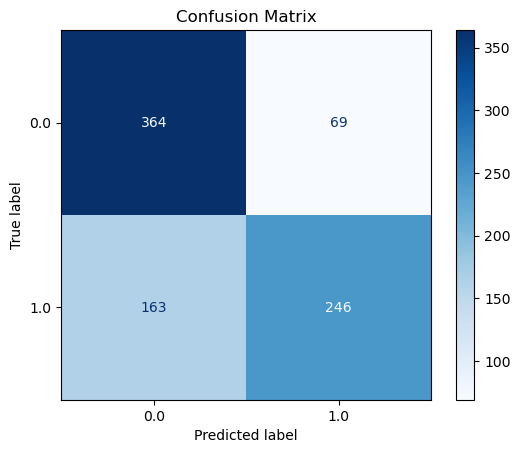

In [47]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

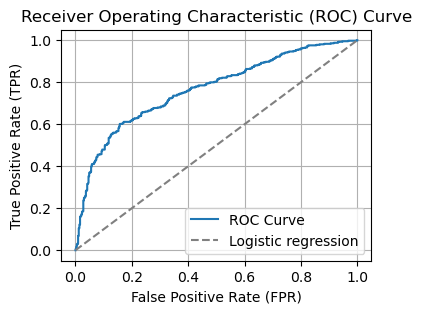

AUC-ROC Score: 0.7664161448245876


In [48]:
# Peroleh skor probabilitas prediksi kelas positif dari model
y_scores = model.predict_proba(X_test)[:, 1]

# Hitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

## Plot ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Logistic regression')

# Menampilkan threshold optimal pada plot
#plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Evaluasi kinerja model dengan menghitung Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc)

## Naive Bayes

In [49]:
import time  # Import modul time untuk mengukur waktu eksekusi
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV untuk pencarian hyperparameter terbaik

# Inisialisasi Model Naive Bayes
model = GaussianNB()  # Membuat model Gaussian Naive Bayes

# Menentukan Ruang Hyperparameter
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variasi nilai var_smoothing yang akan diuji
}

# Inisialisasi GridSearchCV untuk Optimasi Hyperparameter

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

# Proses Training Model dengan GridSearchCV
start_time = time.time()  # Catat waktu sebelum training
grid_search.fit(X_train, y_train)  # Melatih model dengan data training
training_time = time.time() - start_time  # Hitung waktu training
print(f"Waktu training: {training_time:.4f} detik")  # Tampilkan waktu training

# Mendapatkan Model Terbaik Setelah Hyperparameter Tuning
best_model = grid_search.best_estimator_  # Menyimpan model terbaik berdasarkan hasil GridSearchCV

# Proses Prediksi Model
start_time = time.time()  # Catat waktu sebelum prediksi
predictions = best_model.predict(X_test)  # Melakukan prediksi pada data testing
prediction_time = time.time() - start_time  # Hitung waktu prediksi
print(f"Waktu prediksi: {prediction_time:.4f} detik")  # Tampilkan waktu prediksi

# Evaluasi Model dengan Akurasi
accuracy = accuracy_score(y_test, predictions)  # Menghitung akurasi model
print("Akurasi model setelah penyetelan hyperparameter:", accuracy)  # Tampilkan hasil akurasi


Waktu training: 0.2517 detik
Waktu prediksi: 0.0000 detik
Akurasi model setelah penyetelan hyperparameter: 0.7054631828978623


In [50]:
print("\n NAIVE BAYES \n")

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, predictions))

# Hitung nilai akurasi
accuracy = accuracy_score(y_test, predictions)

# Mengonversi akurasi menjadi persen
accuracy_percent = accuracy * 100
# Menampilkan akurasi
print("Akurasi model:", accuracy_percent, "%\n")



 NAIVE BAYES 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.86      0.75       433
         1.0       0.78      0.55      0.64       409

    accuracy                           0.71       842
   macro avg       0.72      0.70      0.70       842
weighted avg       0.72      0.71      0.70       842

Akurasi model: 70.54631828978623 %



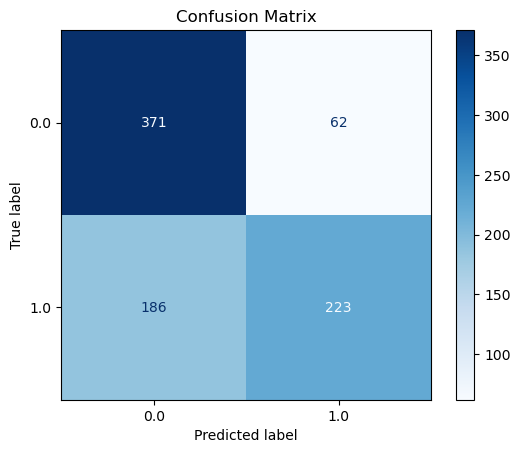

In [51]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

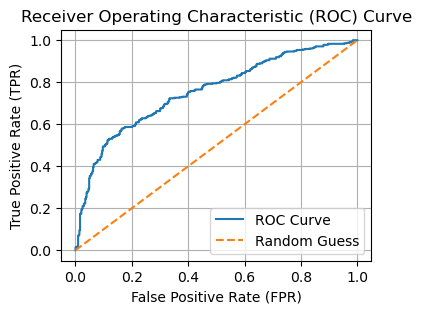

AUC-ROC Score: 0.7560771780436709


In [52]:
# Peroleh skor probabilitas prediksi kelas positif dari model
y_scores = best_model.predict_proba(X_test)[:, 1]

# Hitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi kinerja model dengan menghitung Area Under Curve (AUC)
auc = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc)
